# Customer Churn Prediction - Exploratory Data Analysis

This notebook contains exploratory data analysis for the customer churn prediction project.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.style.use('ggplot')
sns.set_palette('husl')
%matplotlib inline

In [33]:
# Load data
df = pd.read_csv('../data/raw/customer_data.csv')
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (10000, 11)


,customer_id,age,tenure,monthly_charges,total_charges,contract_length,payment_method,internet_service,online_security,tech_support,churn
0,1,47.450712,0.775020,55.410812,1771.077677,24,Electronic Check,DSL,No,Yes,0
1,2,37.926035,0.217442,44.438644,1182.495884,12,Electronic Check,DSL,Yes,Yes,0
2,3,49.715328,0.149032,75.040038,2332.682832,1,Electronic Check,Fiber Optic,Yes,Yes,0
3,4,62.845448,0.198041,30.862749,909.951221,1,Mailed Check,No,Yes,Yes,1
4,5,36.487699,1.748712,59.643211,461.446388,12,Bank Transfer,Fiber Optic,No,Yes,0


In [34]:
# Basic structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   age               10000 non-null  float64
 2   tenure            10000 non-null  float64
 3   monthly_charges   10000 non-null  float64
 4   total_charges     10000 non-null  float64
 5   contract_length   10000 non-null  int64  
 6   payment_method    10000 non-null  object 
 7   internet_service  10000 non-null  object 
 8   online_security   10000 non-null  object 
 9   tech_support      10000 non-null  object 
 10  churn             10000 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 859.5+ KB


In [35]:
# Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
age,10000.0,39.967960,15.051936,-18.836004,29.911142,39.961075,50.066213,98.893566
tenure,10000.0,2.053468,2.050534,0.000096,0.595578,1.431887,2.831046,18.991432
monthly_charges,10000.0,64.915476,19.820188,-12.127507,51.191044,64.953548,78.468615,143.846620
total_charges,10000.0,1483.830442,804.529309,-2072.483091,933.786248,1486.499828,2035.742923,4482.266676
contract_length,10000.0,12.344400,8.871734,1.000000,1.000000,12.000000,24.000000,24.000000
churn,10000.0,0.318800,0.466035,0.000000,0.000000,0.000000,1.000000,1.000000


In [36]:
# Missing values
df.isnull().sum()


customer_id         0
age                 0
tenure              0
monthly_charges     0
total_charges       0
contract_length     0
payment_method      0
internet_service    0
online_security     0
tech_support        0
churn               0
dtype: int64

In [37]:

# Convert total_charges to numeric
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')


In [38]:

# Check for duplicates
df.duplicated().sum()


np.int64(0)

In [39]:

# Drop customer_id (identifier only)
df.drop(columns='customer_id', inplace=True)


In [40]:
numerical = ['age', 'tenure', 'monthly_charges', 'total_charges']
categorical = ['contract_length', 'payment_method', 'internet_service', 'online_security', 'tech_support']
target = 'churn'


In [41]:
# 4. 📊 Univariate Analysis

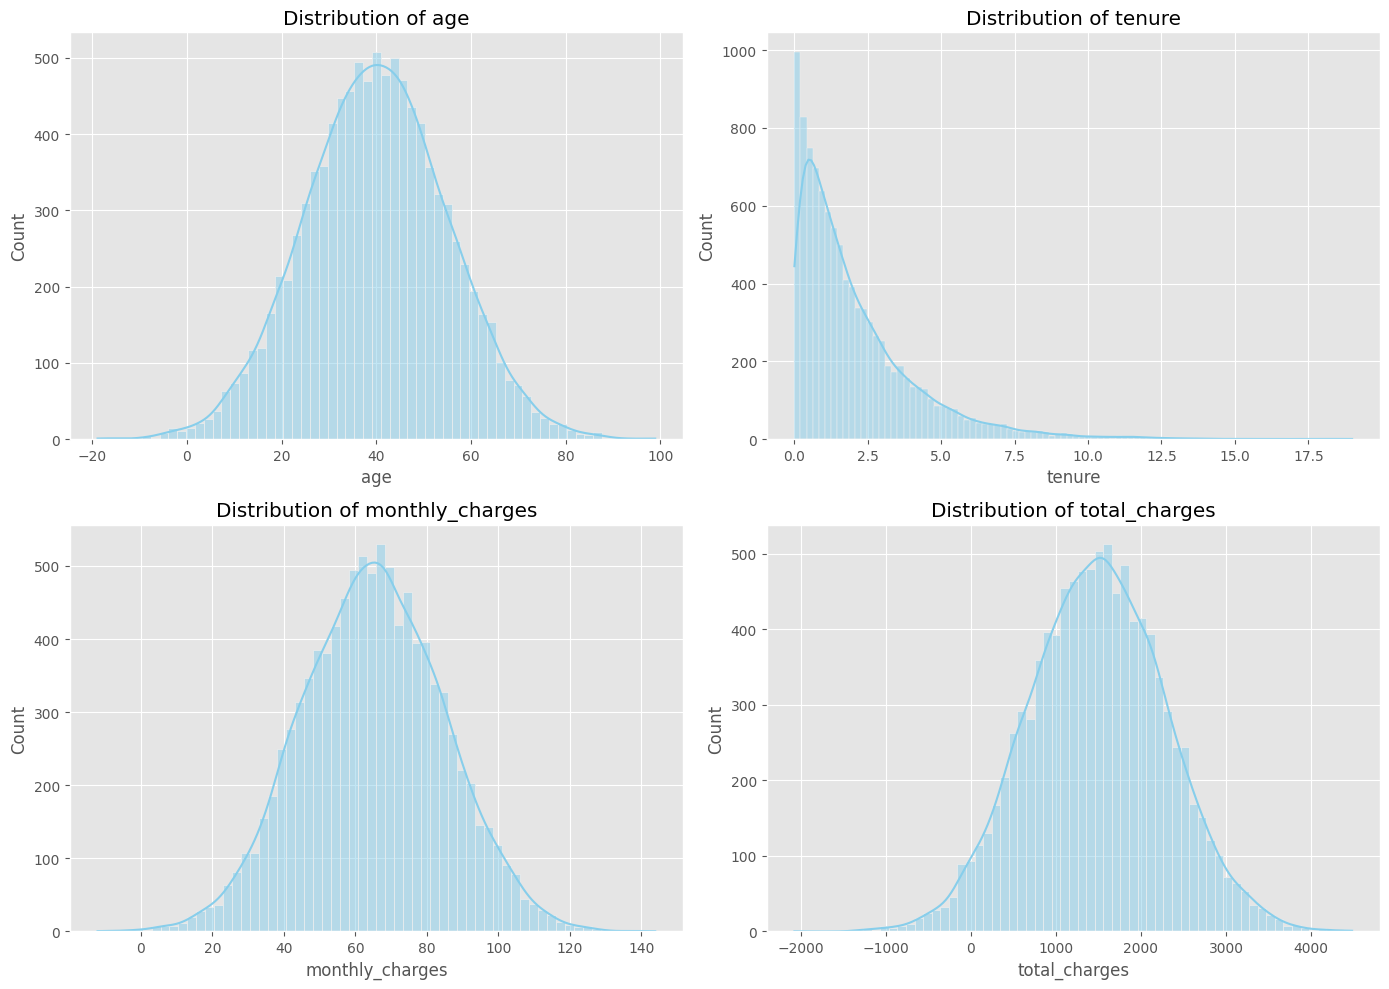

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


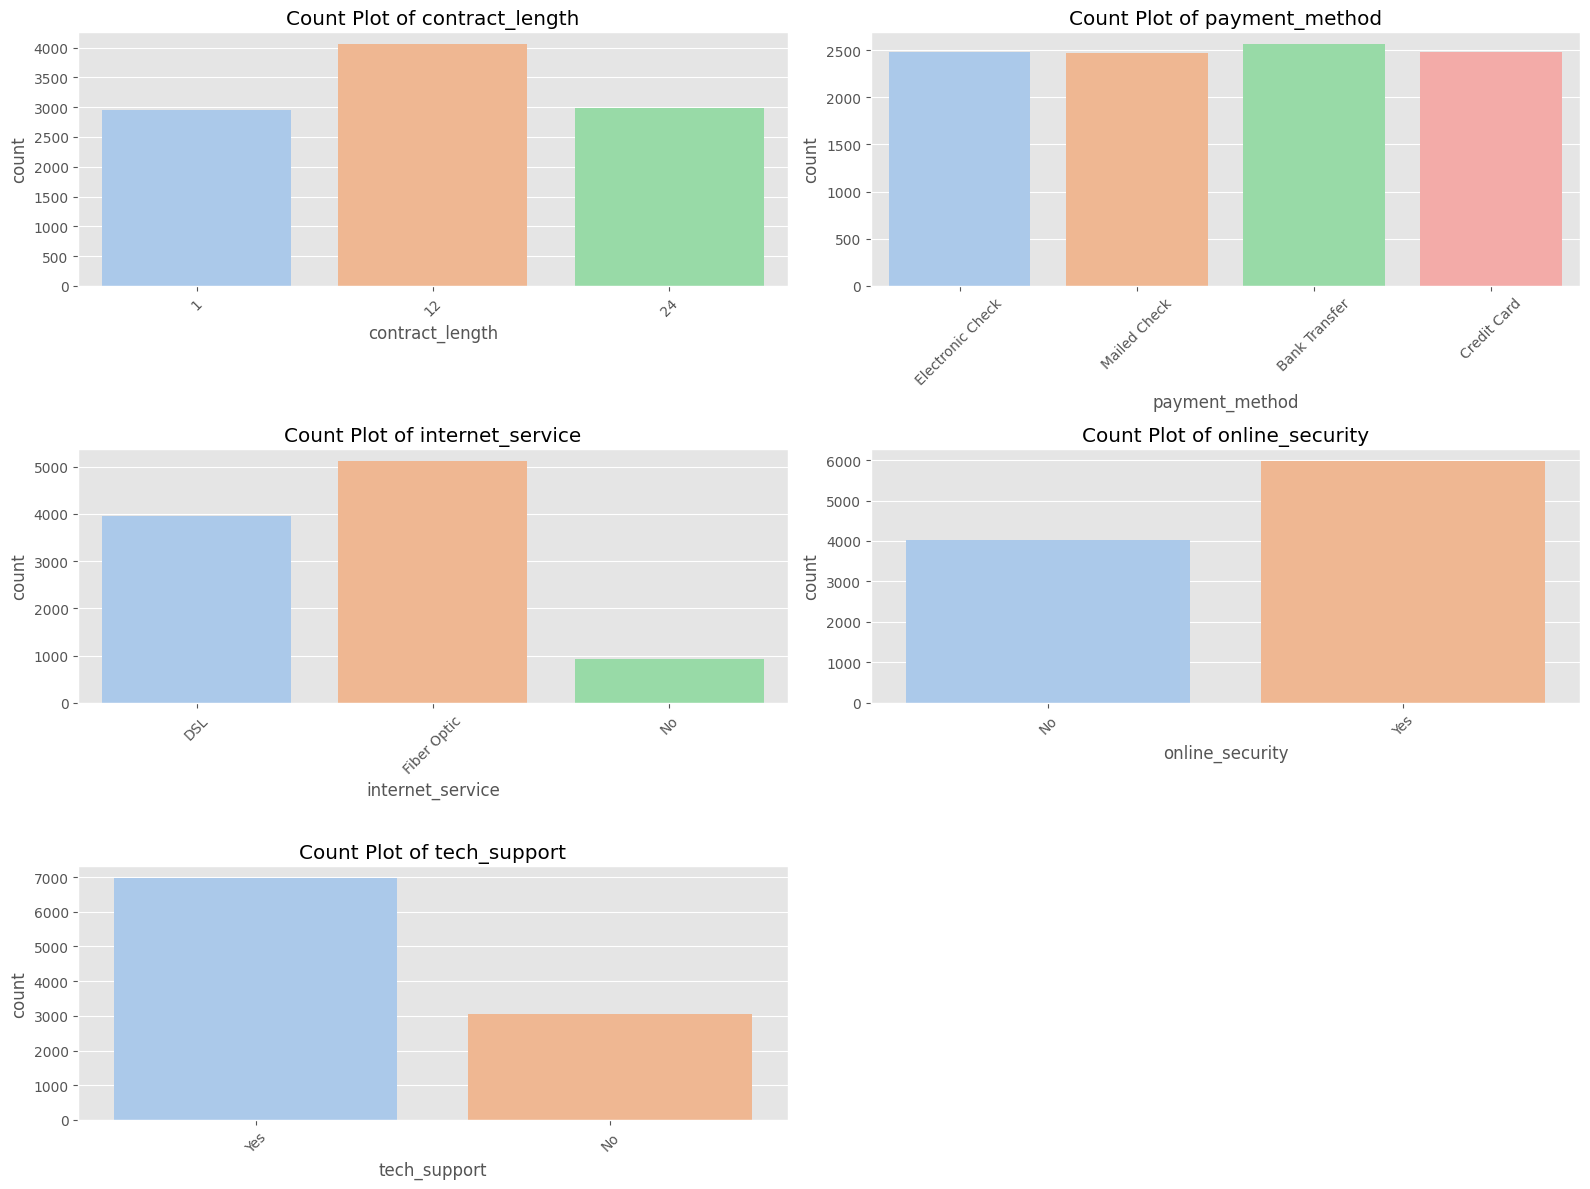

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplot if columns < 6
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [44]:
# 2. 🔁 Bivariate Analysis with Churn (Target)

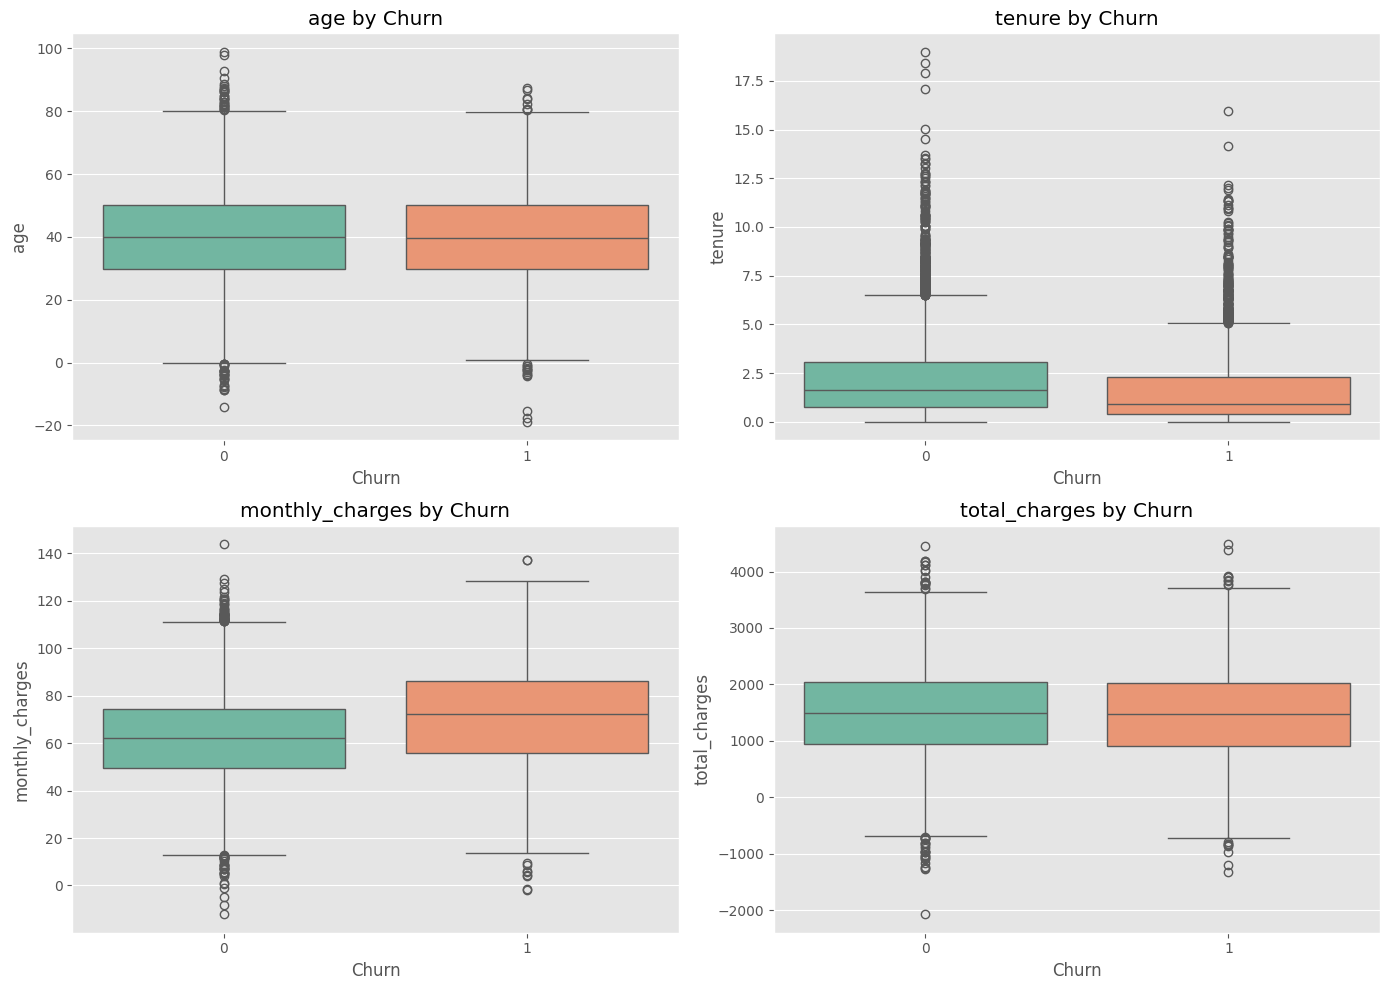

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


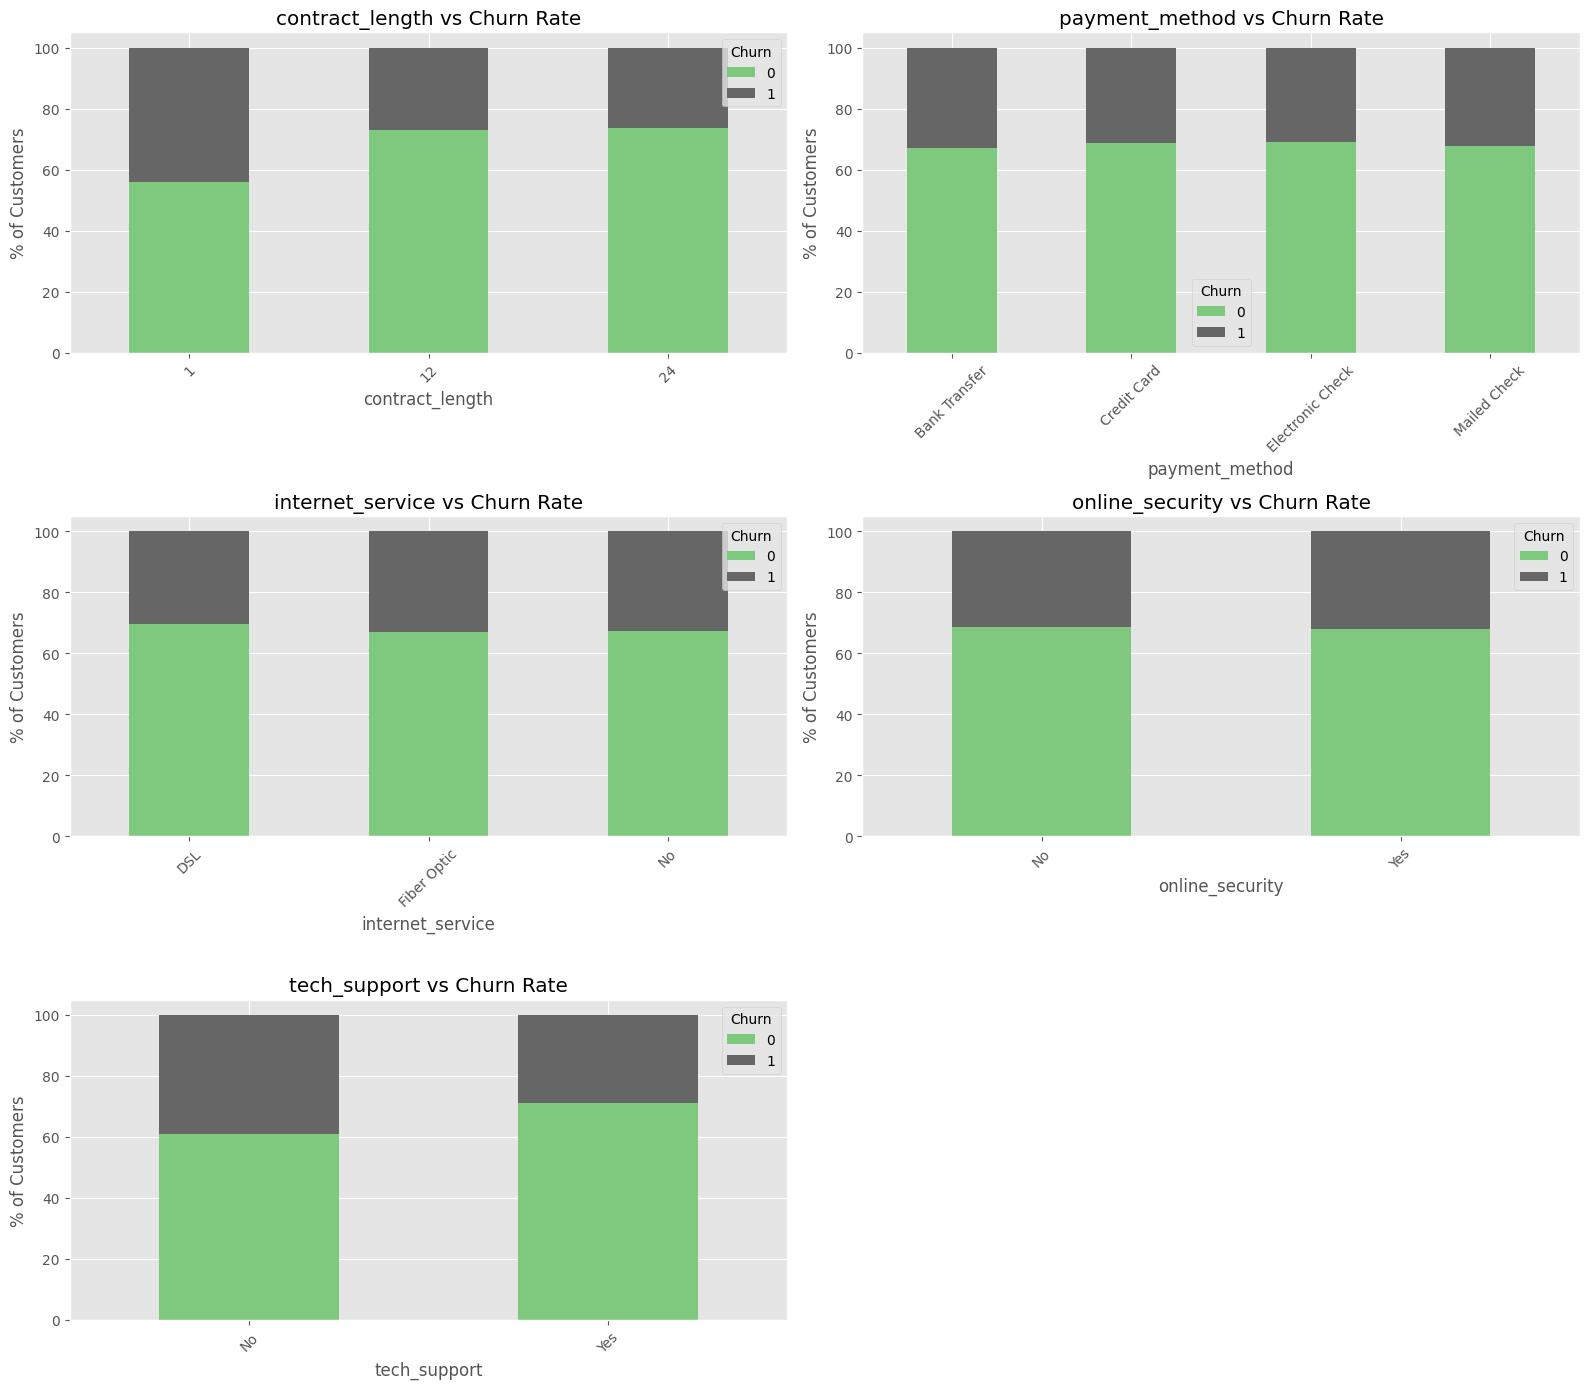

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(categorical):
    ct = pd.crosstab(df[col], df['churn'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='Accent')
    axes[i].set_title(f'{col} vs Churn Rate')
    axes[i].set_ylabel('% of Customers')
    axes[i].legend(title='Churn')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


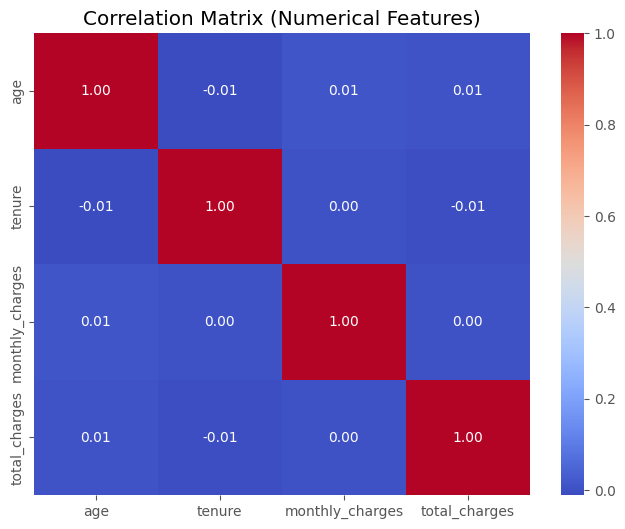

In [47]:
plt.figure(figsize=(8, 6))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


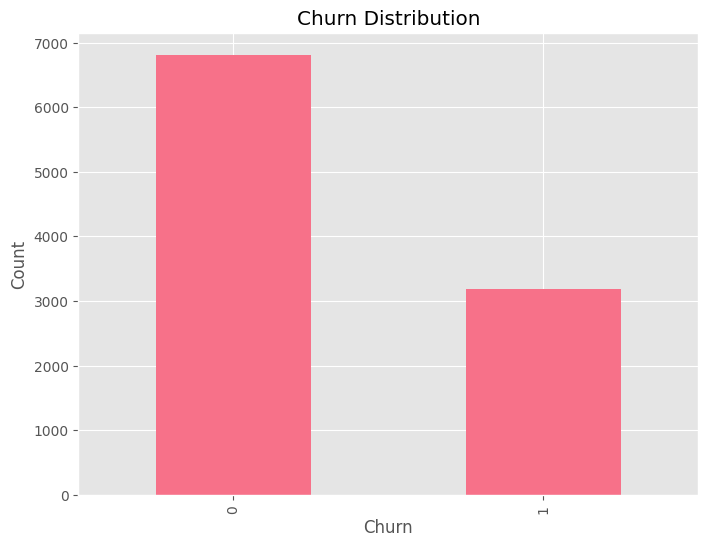

In [48]:
# Churn distribution
plt.figure(figsize=(8, 6))
df['churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [50]:

# Label encode binary variables
le = LabelEncoder()
df['churn'] = le.fit_transform(df['churn'])  # Yes:1, No:0

# One-hot encoding for categorical vars
categorical = ['contract_length', 'payment_method', 'internet_service', 'online_security', 'tech_support']
df = pd.get_dummies(df, columns=categorical, drop_first=True)

# Define X and y
X = df.drop('churn', axis=1)
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier()
}

params = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1]
    }
}


In [52]:
results = []

for name, model in models.items():
    print(f"\n🔹 Training {name} without tuning...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    auc = roc_auc_score(y_test, proba) if proba is not None else None
    results.append((name, "Default", accuracy_score(y_test, preds), roc_auc_score(y_test, proba) if proba is not None else 0))

    print(classification_report(y_test, preds))

    if name in params:
        print(f"🔧 Tuning {name}...")
        grid = GridSearchCV(model, params[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        tuned_preds = best_model.predict(X_test)
        tuned_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
        tuned_auc = roc_auc_score(y_test, tuned_proba) if tuned_proba is not None else None
        results.append((name, "Tuned", accuracy_score(y_test, tuned_preds), tuned_auc if tuned_proba is not None else 0))

        print("Best Parameters:", grid.best_params_)
        print(classification_report(y_test, tuned_preds))
        print("="*80)



🔹 Training LogisticRegression without tuning...
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1389
           1       0.61      0.27      0.37       611

    accuracy                           0.72      2000
   macro avg       0.67      0.59      0.60      2000
weighted avg       0.70      0.72      0.68      2000

🔧 Tuning LogisticRegression...
Best Parameters: {'C': 0.01}
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1389
           1       0.60      0.23      0.33       611

    accuracy                           0.72      2000
   macro avg       0.67      0.58      0.58      2000
weighted avg       0.69      0.72      0.67      2000


🔹 Training DecisionTree without tuning...
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1389
           1       0.39      0.40      0.39       611

    accuracy                  

In [53]:
final_results = pd.DataFrame(results, columns=["Model", "Version", "Accuracy", "ROC_AUC"])
final_results.sort_values(by=['ROC_AUC', 'Accuracy'], ascending=False, inplace=True)

print("\n📈 Final Model Comparison:")
print(final_results)



📈 Final Model Comparison:
                 Model  Version  Accuracy   ROC_AUC
12    GradientBoosting    Tuned    0.7300  0.726997
11    GradientBoosting  Default    0.7265  0.723997
5         RandomForest    Tuned    0.7245  0.720053
3         DecisionTree    Tuned    0.7305  0.711928
1   LogisticRegression    Tuned    0.7180  0.701504
0   LogisticRegression  Default    0.7230  0.701463
10          NaiveBayes  Default    0.7135  0.695000
4         RandomForest  Default    0.7120  0.693958
9                  SVM    Tuned    0.7120  0.692963
8                  SVM  Default    0.7120  0.692942
7                  KNN    Tuned    0.6760  0.631701
6                  KNN  Default    0.6630  0.609356
2         DecisionTree  Default    0.6235  0.560265


In [54]:
best_model = final_results.iloc[0]
print(f"\n✅ Best Model: {best_model['Model']} ({best_model['Version']})")
print(f"   Accuracy: {best_model['Accuracy']:.4f}")
print(f"   ROC AUC : {best_model['ROC_AUC']:.4f}")



✅ Best Model: GradientBoosting (Tuned)
   Accuracy: 0.7300
   ROC AUC : 0.7270
